Veuillez entrer la valeur du parametre m (m <= 3) 2
Veuillez entrer le nombre de noeuds final 5



Création du graphe inital...
Graphe créé, ajout de nouveaux sommets

ajouter 1 sommet
Sommet ajouté: 4

Ajout en cours...
Arrete ajoutée: 4 2

Ajout en cours...
Arrete ajoutée: 4 0

ajouter 2 sommet
Sommet ajouté: 5

Ajout en cours...
Arrete ajoutée: 5 2

Ajout en cours...
Arrete ajoutée: 5 0


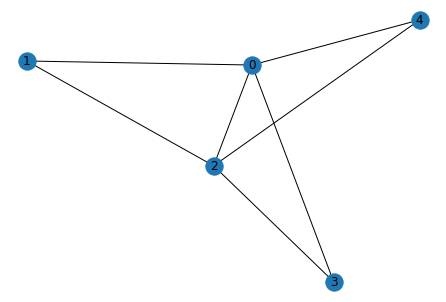

In [34]:
import networkx as nx
import random as rd
import numpy as np

#cette fonction calcule la liste de probabilités avec lesquelles chaque sommet existant sera connecté au nouveau sommet 
#et retourne un sommet choisi aleatoirement pour le connecter 
def random_proba_som():
    som_probas = []
    for som in G.nodes():
        som_degre = G.degree(som)
        #print("le degre du sommet",som,":",som_degre)
        som_proba = som_degre / (2* len(G.edges()))
        #print("probabilité de connexion du noeud: {}".format(som_proba))
        som_probas.append(som_proba)
        #ajout de la probablilité du noeud som à la liste des probabilités
    random_sommet =np.random.choice(G.nodes, p = som_probas)
    #print("le sommet choisi aleatoirement: {}".format(random_sommet))
    return random_sommet   

#cette fonction ajoute les nouvelles arretes
def ajout_arrete():
    if len(G.edges()) == 0:
        random_sommet = 0
    else:
        random_sommet = random_proba_som()
    nv_arrete = (random_sommet, nv_sommet)
    if nv_arrete in G.edges():
            print("\nAjout en cours...")
            print("Arrete existante deja: {} {}".format(nv_sommet + 1, random_sommet))
            ajout_arrete()
    else:
            print("\nAjout en cours...")
            G.add_edge(nv_sommet, random_sommet)
            print("Arrete ajoutée: {} {}".format(nv_sommet + 1, random_sommet))          

            

nb_init = 3
# on fixe le nombre de noeuds du grpahe initial, ici notre graphe initial est une clique de 3 noeuds
count = 0
nv_sommet=  nb_init

m= int(input("Veuillez entrer la valeur du parametre m (m <= 3)")) 
nb_final=int(input("Veuillez entrer le nombre de noeuds final"))

print("\nCréation du graphe inital...")

G=nx.complete_graph(nb_init)
#la fonction complete_graph retourne un graphe avec nb_init noeuds 
print("Graphe créé, ajout de nouveaux sommets")  

for f in range(nb_final - nb_init):
    print("\najouter" ,count+1 ,"sommet")
    G.add_node(nb_init + count)
    print("Sommet ajouté: {}".format(nb_init + count + 1))
    count += 1
    for e in range(0, m):
        ajout_arrete()
    nv_sommet += 1


nx.draw(G, with_labels=True) 
plt.show() 
nx.write_edgelist(G, "text.txt")    
        